## Handwriting Recognition - English

### Data

- Training, Validation & Testing [A-Z Handwritten Alphabets in .csv format](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data preporcessing

In [2]:
# load data
data = pd.read_csv('../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [4]:
# get classes (first column i.e 0 contains labels)
data['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [5]:
# classes hashmap
classes = {i:chr(i+65) for i in range(26)}
classes

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [6]:
# get images (x) & labels (y)
# the first column contains labels, while the remaining are the flattened array of 28 x 28 image pixels
y = data.values[:, 0]
x = data.values[:, 1:]

In [7]:
# reshape images 
x = np.reshape(x, (x.shape[0], 28, 28, 1))  

In [8]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
# training & testing generators
datagen_train = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=False,
                                   fill_mode='nearest')
datagen_test = ImageDataGenerator(rescale=1./255)

In [10]:
data_train = datagen_train.flow(x_train, y_train, subset='training', 
                                batch_size=64, shuffle=True)
data_valid = datagen_train.flow(x_train, y_train, subset='validation',
                                batch_size=64, shuffle=True)
data_test = datagen_test.flow(x_test, y_test, batch_size=1, shuffle=False)

### Model Develpment & Training

In [11]:
model = Sequential([
                Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                MaxPooling2D(2,2),
                Conv2D(32, (3,3), activation='relu'),
                MaxPooling2D(2,2), 
                Flatten(), 
                Dense(512, activation='relu'), 
                Dense(26, activation='softmax')])  # 26 = total english letters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

In [12]:
# compile model
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# fit model 
history = model.fit(data_train, 
                    epochs=10,
                    validation_data=data_valid,
                    steps_per_epoch=500,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
500/500 - 19s - loss: 2.0252 - accuracy: 0.4245 - val_loss: 1.4404 - val_accuracy: 0.5741 - 19s/epoch - 38ms/step
Epoch 2/10
500/500 - 18s - loss: 1.2506 - accuracy: 0.6408 - val_loss: 1.0443 - val_accuracy: 0.7028 - 18s/epoch - 36ms/step
Epoch 3/10
500/500 - 18s - loss: 0.8631 - accuracy: 0.7564 - val_loss: 0.7614 - val_accuracy: 0.7847 - 18s/epoch - 36ms/step
Epoch 4/10
500/500 - 18s - loss: 0.6583 - accuracy: 0.8141 - val_loss: 0.5708 - val_accuracy: 0.8366 - 18s/epoch - 36ms/step
Epoch 5/10
500/500 - 18s - loss: 0.5328 - accuracy: 0.8507 - val_loss: 0.4663 - val_accuracy: 0.8669 - 18s/epoch - 36ms/step
Epoch 6/10
500/500 - 18s - loss: 0.4546 - accuracy: 0.8708 - val_loss: 0.4764 - val_accuracy: 0.8603 - 18s/epoch - 36ms/step
Epoch 7/10
500/500 - 18s - loss: 0.4050 - accuracy: 0.8834 - val_loss: 0.4073 - val_accuracy: 0.8800 - 18s/epoch - 36ms/step
Epoch 8/10
500/500 - 18s - loss: 0.3694 - accuracy: 0.8957 - val_loss: 0.3467 - val_accuracy: 0.8997 - 18s/epoch - 36ms/step


### Model Evaluation

In [14]:
# loss and accuracy
eval_model = model.evaluate(data_test, return_dict=True)
eval_model

74490/74490 [==============================] - 187s 3ms/step - loss: 0.1433 - accuracy: 0.9609


{'loss': 0.14331185817718506, 'accuracy': 0.9608672261238098}

Text(0.5, 1.0, 'Training & Validation Loss')

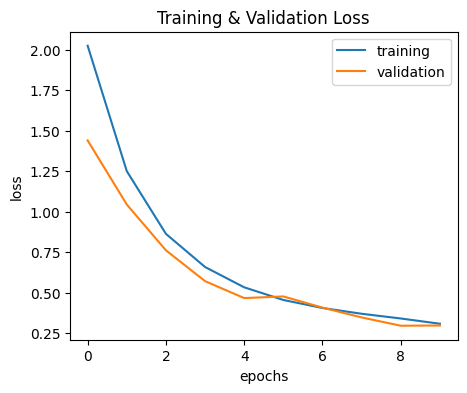

In [15]:
# training and validation loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.title('Training & Validation Loss')

### Testing an image

In [16]:
# get an image and its actual label/class
# the batch size in data_test is 1, each batch contains 1 sample 
# each sample is a 2d nested array. index 0= image features(x), index 1= label(y)
test_img = data_test[0][0]          # data_test[i][x] i=ith sample, x=features
test_label = data_test[0][1][0]     # data_test[i][y] i=ith sample, y=label array

In [17]:
# predict label
test_label_pred = np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 150ms/step


Text(0.5, 1.0, 'actual:O, predicted:O')

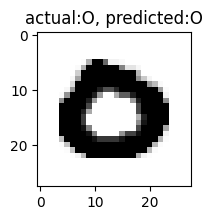

In [18]:
# plot results
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28, 28), cmap='binary')
plt.title(f'actual:{classes[test_label]}, predicted:{classes[test_label_pred]}')

### Model Predictions

1/1 [==============================] - 0s 27ms/step


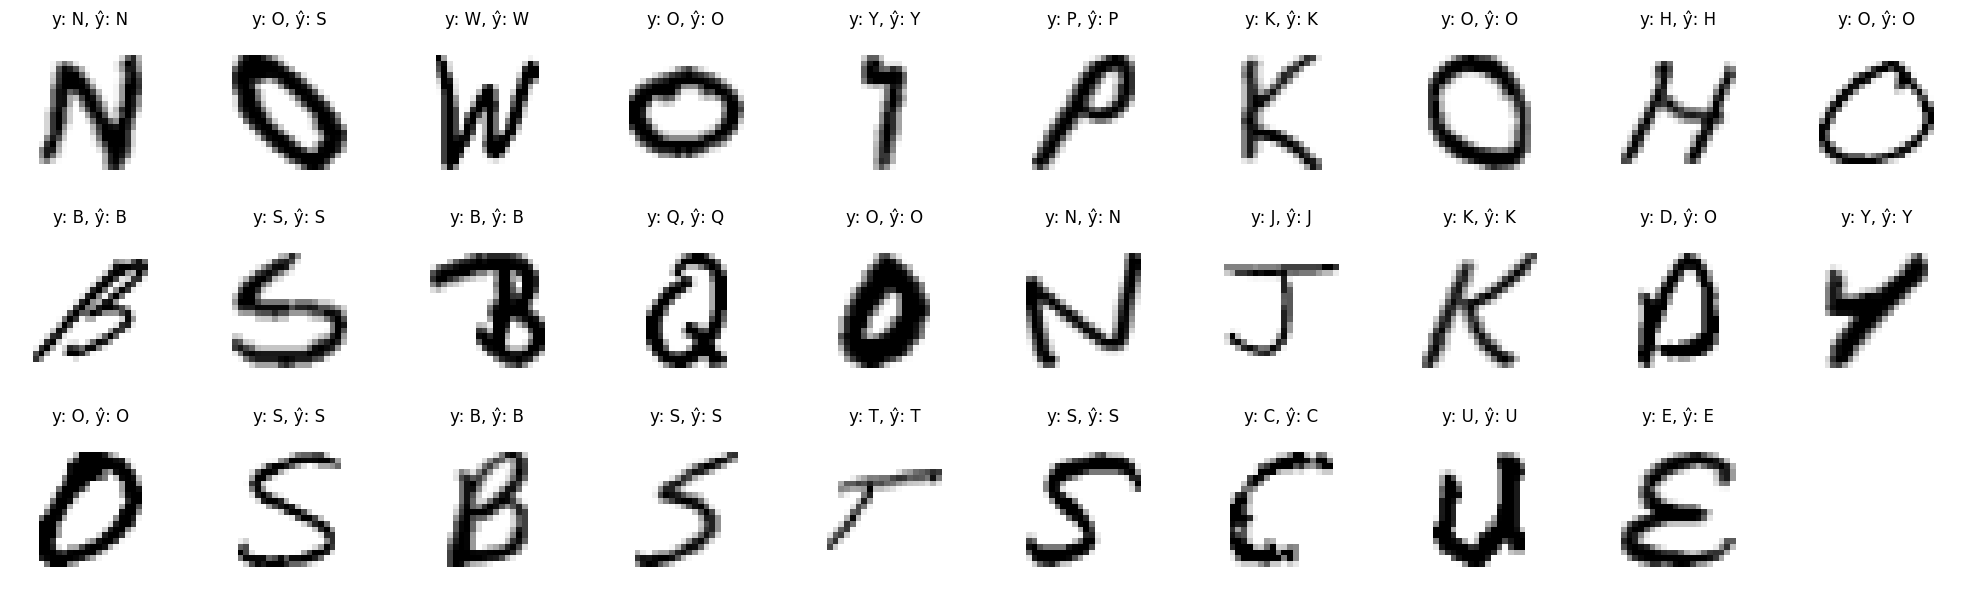

In [19]:
plt.figure(figsize=(20, 20))
for i in range(1, 30):
    x = data_test[i][0]
    y = data_test[i][1][0]
    y_pred = np.argmax(model.predict(x))
    plt.subplot(10, 10, i)
    plt.imshow(x.reshape(28, 28), cmap='binary')
    plt.title(f"y: {classes[y]}, y\u0302: {classes[y_pred]}") # y=actual, ŷ=pred
    plt.axis('off')
plt.tight_layout()
plt.show()